In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("/home/placement/Downloads/fiat500.csv")

In [4]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [5]:
data1=data.drop(['ID','lat','lon'],axis=1)  #unwanted columns removed

In [6]:
data1

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [7]:
data=pd.get_dummies(data)

In [8]:
data

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price,model_lounge,model_pop,model_sport
0,1,51,882,25000,1,44.907242,8.611560,8900,1,0,0
1,2,51,1186,32500,1,45.666359,12.241890,8800,0,1,0
2,3,74,4658,142228,1,45.503300,11.417840,4200,0,0,1
3,4,51,2739,160000,1,40.633171,17.634609,6000,1,0,0
4,5,73,3074,106880,1,41.903221,12.495650,5700,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1533,1534,51,3712,115280,1,45.069679,7.704920,5200,0,0,1
1534,1535,74,3835,112000,1,45.845692,8.666870,4600,1,0,0
1535,1536,51,2223,60457,1,45.481541,9.413480,7500,0,1,0
1536,1537,51,2557,80750,1,45.000702,7.682270,5990,1,0,0


In [9]:
data.shape               

(1538, 11)

In [10]:
y=data['price']             
x=data.drop('price',axis=1)

In [11]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [12]:
x

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,model_lounge,model_pop,model_sport
0,1,51,882,25000,1,44.907242,8.611560,1,0,0
1,2,51,1186,32500,1,45.666359,12.241890,0,1,0
2,3,74,4658,142228,1,45.503300,11.417840,0,0,1
3,4,51,2739,160000,1,40.633171,17.634609,1,0,0
4,5,73,3074,106880,1,41.903221,12.495650,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1533,1534,51,3712,115280,1,45.069679,7.704920,0,0,1
1534,1535,74,3835,112000,1,45.845692,8.666870,1,0,0
1535,1536,51,2223,60457,1,45.481541,9.413480,0,1,0
1536,1537,51,2557,80750,1,45.000702,7.682270,1,0,0


In [13]:
 !pip install scikit-learn

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
x_test.head(5)

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,model_lounge,model_pop,model_sport
481,482,51,3197,120000,2,40.174702,18.167629,0,1,0
76,77,62,2101,103000,1,45.797859,8.644440,0,1,0
1502,1503,51,670,32473,1,41.107880,14.208810,1,0,0
669,670,51,913,29000,1,45.778591,8.946250,1,0,0
1409,1410,51,762,18800,1,45.538689,9.928310,1,0,0


In [16]:
x_train.shape

(1030, 10)

In [17]:
x_train.head()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,model_lounge,model_pop,model_sport
527,528,51,425,13111,1,45.022388,7.58602,1,0,0
129,130,51,1127,21400,1,44.332531,7.54592,1,0,0
602,603,51,2039,57039,1,40.748241,14.52835,0,1,0
331,332,51,1155,40700,1,42.143860,12.54016,1,0,0
323,324,51,425,16783,1,41.903221,12.49565,1,0,0


In [18]:
y_train.head()

527    9990
129    9500
602    7590
331    8750
323    9100
Name: price, dtype: int64

In [19]:
y_test.head()

481     7900
76      7900
1502    9400
669     8500
1409    9700
Name: price, dtype: int64

In [20]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() #creating object of LinearRegression
reg.fit(x_train,y_train)  #training are fitting LR object using training data

LinearRegression()

In [21]:
ypred=reg.predict(x_test)

In [22]:
ypred

array([ 5819.19308764,  7248.82914161,  9741.8936974 ,  9798.98033074,
       10055.00624601,  9551.4955679 ,  9758.01743879, 10122.9778365 ,
        9654.9661814 ,  9251.1403257 , 10478.09512253,  7807.3005255 ,
        7705.15873781,  6295.63244894,  9545.40486313, 10422.92177704,
        9616.90811615,  7756.9171161 ,  4893.88454414, 10581.46142719,
       10465.24078346, 10443.29318231,  7518.43696046, 10028.21911459,
        6990.73118896,  8989.86900819,  4823.51364349,  6989.03118684,
        7822.83203734,  9683.17944083,  7344.21343132,  5341.43860798,
        5420.78405336,  5092.38401339,  8971.44357515,  5702.81242412,
        9920.16285466,  8334.58448277,  6220.93323723,  8389.23958511,
        9695.84208061,  6859.59630725,  9101.22635456, 10063.22592995,
        8621.83915759, 10175.06753933,  9063.21918346,  8867.24865352,
        7094.44228184,  9058.37693565,  9474.82390731, 10406.09102832,
       10112.65006224,  6820.90463865,  9700.36507783,  9382.18149429,
      

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8428319728488683

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)


577189.6736608233

In [25]:
import math
a=577189.6736608233
print(math.sqrt(a))

759.7300005007195


In [26]:
ypred

array([ 5819.19308764,  7248.82914161,  9741.8936974 ,  9798.98033074,
       10055.00624601,  9551.4955679 ,  9758.01743879, 10122.9778365 ,
        9654.9661814 ,  9251.1403257 , 10478.09512253,  7807.3005255 ,
        7705.15873781,  6295.63244894,  9545.40486313, 10422.92177704,
        9616.90811615,  7756.9171161 ,  4893.88454414, 10581.46142719,
       10465.24078346, 10443.29318231,  7518.43696046, 10028.21911459,
        6990.73118896,  8989.86900819,  4823.51364349,  6989.03118684,
        7822.83203734,  9683.17944083,  7344.21343132,  5341.43860798,
        5420.78405336,  5092.38401339,  8971.44357515,  5702.81242412,
        9920.16285466,  8334.58448277,  6220.93323723,  8389.23958511,
        9695.84208061,  6859.59630725,  9101.22635456, 10063.22592995,
        8621.83915759, 10175.06753933,  9063.21918346,  8867.24865352,
        7094.44228184,  9058.37693565,  9474.82390731, 10406.09102832,
       10112.65006224,  6820.90463865,  9700.36507783,  9382.18149429,
      

In [27]:
Results=pd.DataFrame(columns=['price','predicate'])
Results['price']=y_test
Results['predicate']=ypred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,price,predicate,Id
0,481,7900,5819.193088,0
1,76,7900,7248.829142,1
2,1502,9400,9741.893697,2
3,669,8500,9798.980331,3
4,1409,9700,10055.006246,4
5,1414,9900,9551.495568,5
6,1089,9900,9758.017439,6
7,1507,9950,10122.977837,7
8,970,10700,9654.966181,8
9,1198,8999,9251.140326,9


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

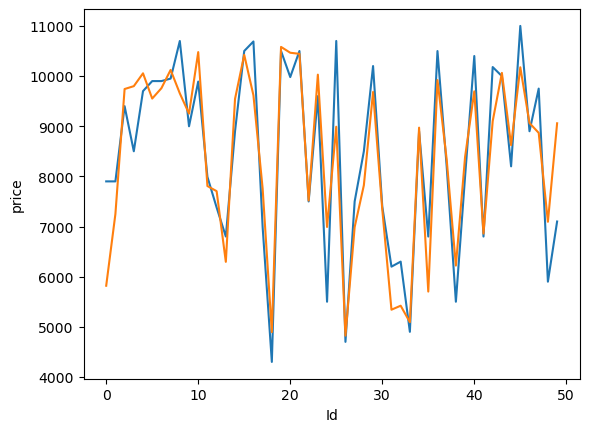

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='price',data=Results.head(50))
sns.lineplot(x='Id',y='predicate',data=Results.head(50))
plt.plot